In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import math
import os
from heapq import nsmallest
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

Cette première partie a pour but de mettre en évidence les coordonnées des particules en fonction des stations de détection. Ensuite, on prend un sytème de coordonnée avec trois stations où on projette toutes les coordonnées des particules dans ce sytème afin d'étudier la distribution des particules.

In [20]:
colnames = ['AugerId','NbStations','Theta','Phi','Energy','L','B','UTCTime','TCore','XCore',
            'YCore','S1000a','dS1000a','Ra','Dec','STheta','SPhi','dTheta','dPhi','dXCore',
            'dYCore','Etimation','IT5','IT51','IT52','IsICRC2005','IsFdTrigger','GeoFitChi2','LDFitChi2','GloFitChi2',
            'GloFitNdof','LDFBeta','LDFGamma','R','SdId','IsICRC2005Posterior','S1000b','EnergyCorr','CICEnergy','GPSTime',
            'Infill','FitBeta','NbNeighbours','Flag','NbPMTs','FlagT2Life','S38S35','BadPeriodsFlag']
data = pd.read_csv('./data/Herald.txt', sep = " ", names = colnames, nrows=1000)

In [21]:
df =  data.loc[(data["Theta"]< 60) & (data["Etimation"]>0) & (data["IT5"]>0) ]
print(len(df))
del df['Energy']
del df['L']
del df['B']
del df['UTCTime']
del df['TCore']
del df['Ra']
del df['Dec']
del df['STheta']
del df['SPhi']
del df['Etimation']
del df['IT5']
del df['IT51']
del df['IT52']
del df['IsICRC2005']
del df['IsFdTrigger']
del df['GeoFitChi2']
del df['LDFitChi2']
del df['GloFitChi2']
del df['LDFBeta']
del df['LDFGamma']
del df['R']
del df['SdId']
del df['IsICRC2005Posterior']
del df['S1000b']
del df['CICEnergy']
del df['GPSTime']
del df['Infill']
del df['FitBeta']
del df['NbNeighbours']
del df['Flag']
del df['NbPMTs']
del df['FlagT2Life']
del df['BadPeriodsFlag']
del df['GloFitNdof']
print(df)

800
         AugerId  NbStations  Theta     Phi     XCore     YCore  S1000a  \
0    40010063800           3  36.45  165.93  -8153.54  -9687.70    3.13   
1    40010131000           3  12.18   59.16  -8032.28 -12922.60    2.29   
2    40010181300           3  18.12  176.69  -4180.64  -3908.79    1.79   
3    40010203300           3  36.00  107.22 -13775.60 -12339.40    3.75   
5    40010320600           4  10.95   63.88   -946.89 -13784.40    8.87   
6    40010357600           3  34.01  -58.53  -4181.78  -9207.15    2.98   
8    40010437200           5  38.41  -38.01   -537.97  -7782.83   14.02   
9    40010484200           3  40.98  178.42    319.49  -4030.13    1.76   
10   40010617400           3  25.19 -146.84  -2495.35  -6314.82    2.53   
11   40010622800           3  26.57 -101.73  -1998.98  -9654.26    2.30   
13   40010954600           3  37.77 -106.77  -6312.41 -12984.30    1.79   
14   40011088500           3  41.69   48.84  -5697.72 -16220.50    2.43   
15   40011121600     

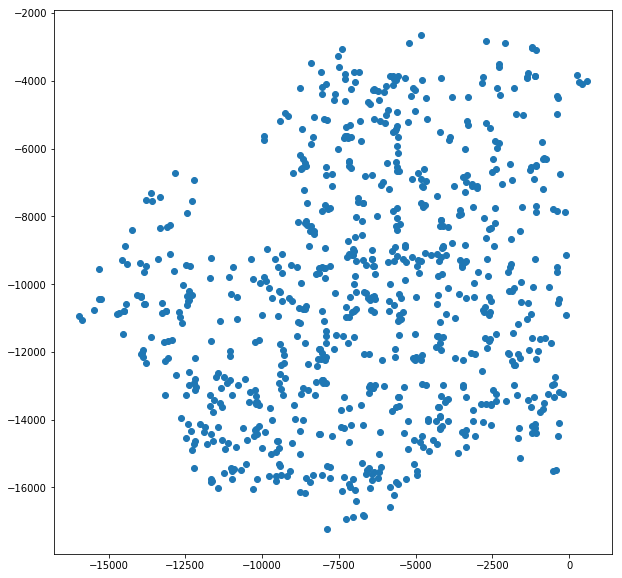

In [22]:
fig = plt.figure()
plt.scatter(df.XCore, df.YCore)
plt.show()

In [23]:
st = pd.read_csv('./data/Array_nov2017_gps.txt',header= None , sep= " ", names = ['StId','Xst','Yst','GPSTime','StopTime'])
print(len(st))
st.drop_duplicates(subset=['Xst','Yst'], keep=False)

1638


,StId,Xst,Yst,GPSTime,StopTime
0,101,468621,6091837,741657600,1.0
1,102,468627,6089249,742348800,1.0
2,103,467128,6091857,742348800,1.0
3,104,467825,6093215,743299200,1.0
4,105,470122,6089278,741830400,1.0
5,106,472371,6087951,749088000,1.0
6,107,472378,6093148,741830400,1.0
7,108,466379,6093152,743299200,1.0
8,109,467061,6094502,743299200,1.0
9,110,469386,6093150,741830400,1.0


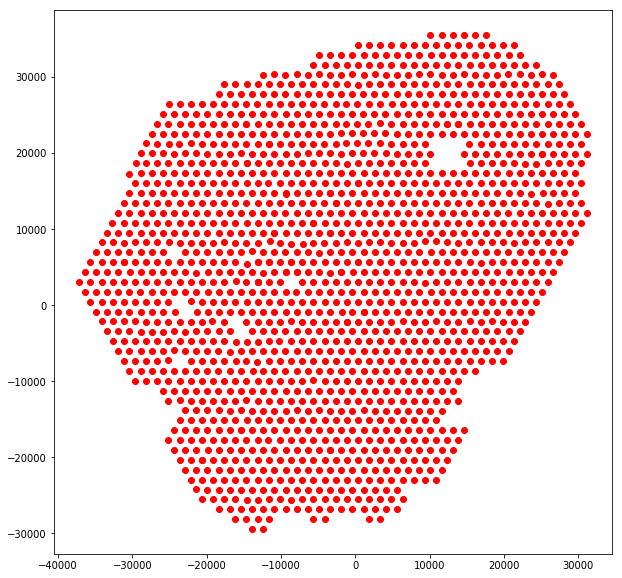

In [24]:
fig1 = plt.figure()
E0  = 477256.0
N0  = 6099203.0
A0  =   1400.0
plt.rcParams['figure.figsize'] = (10,10)
plt.scatter(st.Xst-E0, st.Yst-N0, color='red')
plt.show()

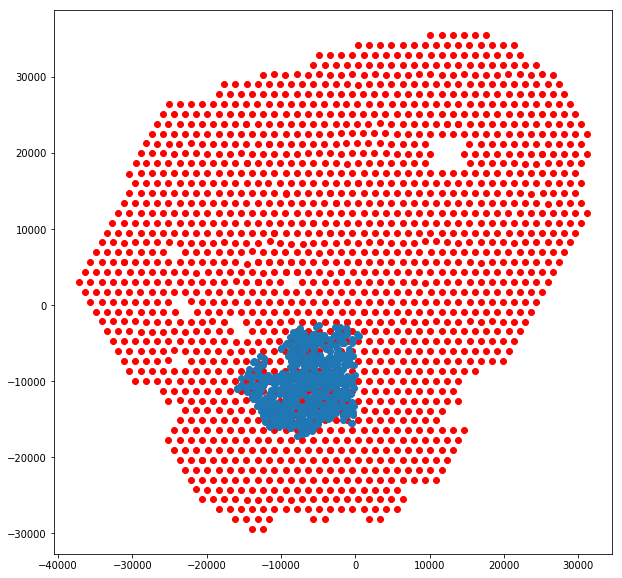

In [25]:
fig1 = plt.figure()
plt.rcParams['figure.figsize'] = (10,10)
plt.scatter(st.Xst-E0, st.Yst-N0, color='red')
plt.scatter(df.XCore, df.YCore) 
plt.show()

Ici on cherche a mettre chaque coordonnées des particules dans un seul et même triangle en projettant les 3 plus distances (les stations les plus proche) dans un unique triangle. Prenons comme exemple ce qu'il se passe pour une particule. 

[-8153.54, -9687.7]
[544.9567887456038, 1046.7918138769853, 1066.6370992987129]
[[-8629.0, -9954.0], [-7134.0, -9925.0], [-7879.0, -8657.0]]
Triangle normal


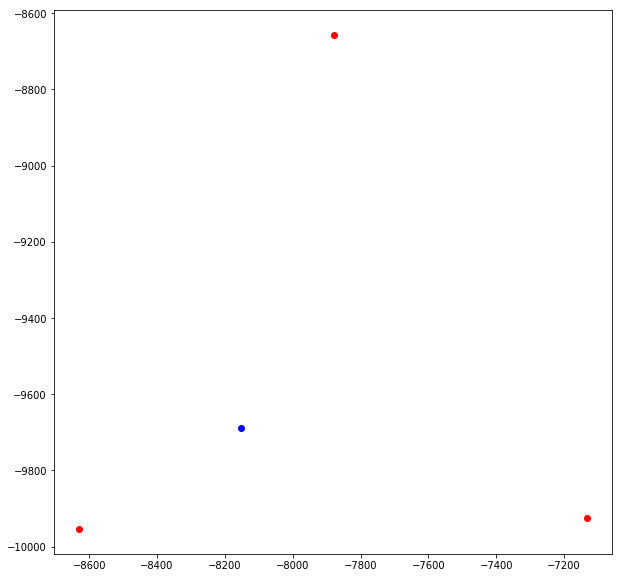

In [26]:
x0 = df.XCore[0] #Ici on prend une coordonnée au hasard 
y0 = df.YCore[0] #et on essaie de calculer toutes les distances entre elle et les stations
R = [] #On crée une liste vide pour mettre toutes ces distances
print([x0,y0])
#On essaie ensuite de retirer les trois plus petites distances
for i in range (len(st)):
    distance = np.sqrt((x0-st.Xst[i]+E0)**2 + (y0-st.Yst[i]+N0)**2)
    R.append(distance)
Rmin = nsmallest(3,R)
print(Rmin)


XY =[] #On crée une liste qui va nous donner les coordonées des trois stations les plus proches 
for j in Rmin:
    Position_station = R.index(j)
    XY.append([st.Xst[Position_station]-E0,st.Yst[Position_station]-N0])
print(XY)

RX = []#On crée deux listes pour les distances en X et en Y
RY = []
X = [] #On va mettre chaque coordonées des stations dans des listes
Y = []
for element in XY:
    x= element[0]
    y= element[1]
    RX.append(x0-x) #On calcule la distance en X et on la met dans la liste
    RY.append(y0-y) #On calcule la distance en Y et on la met dans la liste
    X.append(x)
    Y.append(y)

pos, neg= 0,0 #On cherche à savoir combien de distance en Y sont négatives
for num in RY:
    if num >= 0:
        pos += 1
    else: 
        neg += 1
    if neg == 1:
        print('Triangle normal')
    elif neg == 2:
        print('Triangle renversé')

#On plotte le triangle qu'on est sensé avoir pour vérifié les opérations ci-dessus        
fig2 = plt.figure()
plt.rcParams['figure.figsize'] = (10,10)
plt.scatter(x0,y0, color='Blue')
plt.scatter(X, Y, color='Red')
plt.show()

Xref = XY[0][0]
for coordinate in XY: 
    if coordinate[0] < Xref: 
        Xref = coordinate[0]
        print(Xref)



Regardons maintenant ce qu'il se passe pour toute les particules. 

In [28]:
NXCore = []
NYCore = []
Flag = []
StIds = []
XSt1 = []
YSt1 = []
XSt2 = []
YSt2 = []
XSt3 = []
YSt3 = []
for u in df.index:
    #print([df.XCore[u],df.YCore[u]])#On se donne une idée des coordonnées de la particule
    R = []    
    for i in st.index:
        distance = np.sqrt((df.XCore[u]-st.Xst[i]+E0)**2 + (df.YCore[u]-st.Yst[i]+N0)**2)
        R.append(distance)
        Rmin = nsmallest(3,R)
    #print(Rmin)
        
    XY = []#On trouve les coordonnées des 3 stations les plus proches en fonction de la particule
    XX = []
    YY = []
    StId = []
    for j in Rmin:
        Position_station = R.index(j)
        XY.append([st.Xst[Position_station]-E0,st.Yst[Position_station]-N0])
        XX.append(st.Xst[Position_station]-E0)
        YY.append(st.Yst[Position_station]-N0)
        StId.append(st.StId[Position_station])
    #print(StId)
    #print(XY)
    
    
    X = []
    Y = []
    RX = []
    RY = [] #On va de nouveau regarder dans quel type de triangle se figure la particule
    for element in XY:
        x = element[0]
        y = element[1]
        RX.append(df.XCore[u]-x)
        RY.append(df.YCore[u]-y)
        X.append(x)
        Y.append(y)
    
    pos, neg = 0,0
    for num in RY:
        if num >=0:
            pos += 1
        else:
            neg +=1
    #if neg == 1:
        #print('Triangle normal')
    #elif neg == 2:
        #print('Triangle renversé')
    
    Xref = X[0]
    Yref = Y[0]
    index = X.index(Xref)
    for coordinate in X: 
        if coordinate < Xref:
            Xref= coordinate
            index = X.index(Xref)
            Yref = Y[index]
    
    NewXCore,NewYCore = df.XCore[u]-Xref, df.YCore[u]-Yref
    NewX = []
    for coord in X:
        newx = coord - Xref
        NewX.append(newx)
    NewY = []
    for coordi in Y:
        newy = coordi - Yref
        NewY.append(newy)
    #print(NewXCore,NewYCore)
    #print(NewX,NewY)
    
    #fig3 = plt.figure()
    #plt.rcParams['figure.figsize'] = (10,10)
    #plt.scatter(NewXCore,NewYCore, color='Blue')
    #plt.scatter(NewX, NewY, color='Red')
    #plt.show()
    
    NXCore.append(NewXCore)
    NYCore.append(NewYCore)
    Flag.append(neg)
    StIds.append(StId)
    XSt1.append(XX[0])
    YSt1.append(YY[0])
    XSt2.append(XX[1])
    YSt2.append(YY[1])
    XSt3.append(XX[2])
    YSt3.append(YY[2])
df.loc[:,'NewXCore']= NXCore
df.loc[:,'NewYCore']= NYCore
df.loc[:,'TriangleType']= Flag
df.loc[:,'StIds']= pd.Series(StIds).values
df.loc[:,'XSt1']= XSt1
df.loc[:,'YSt1']= YSt1
df.loc[:,'XSt2']= XSt2
df.loc[:,'YSt2']= YSt2
df.loc[:,'XSt3']= XSt3
df.loc[:,'YSt3']= YSt3    

In [29]:
df.to_json(r'./data/Test.json')

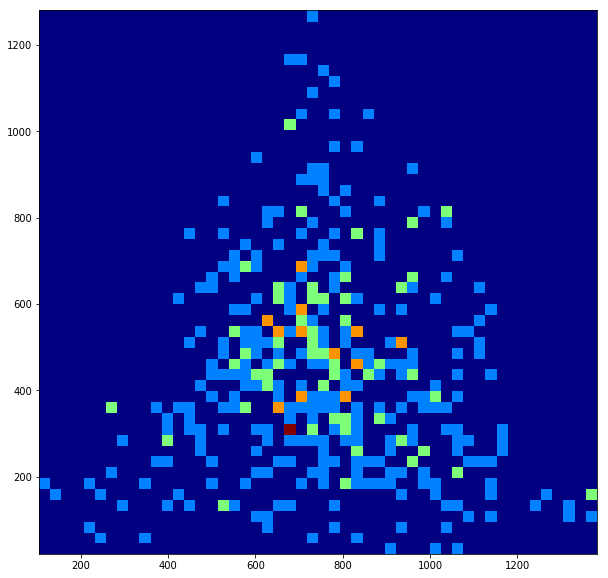

In [30]:
df1 = df.loc[df['TriangleType'] == 1]
plt.hist2d(df1.NewXCore, df1.NewYCore, bins=(50, 50), cmap=plt.cm.jet)
plt.show()

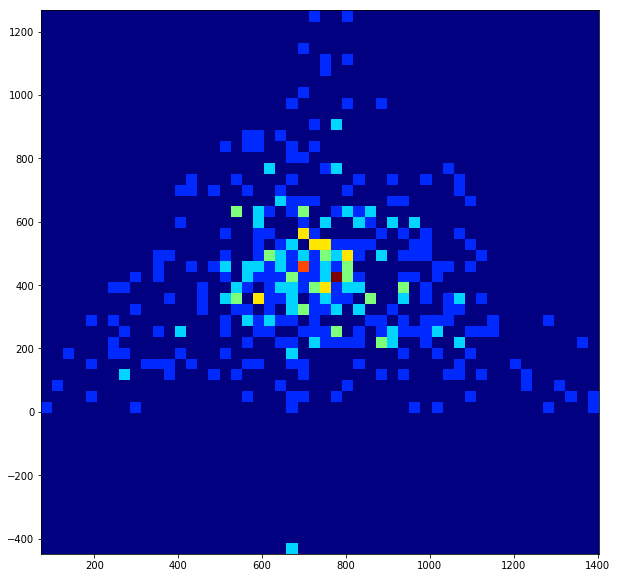

In [31]:
df2 = df.loc[df['TriangleType'] == 2]
plt.hist2d(df2.NewXCore, -df2.NewYCore, bins=(50, 50), cmap=plt.cm.jet)
plt.show()

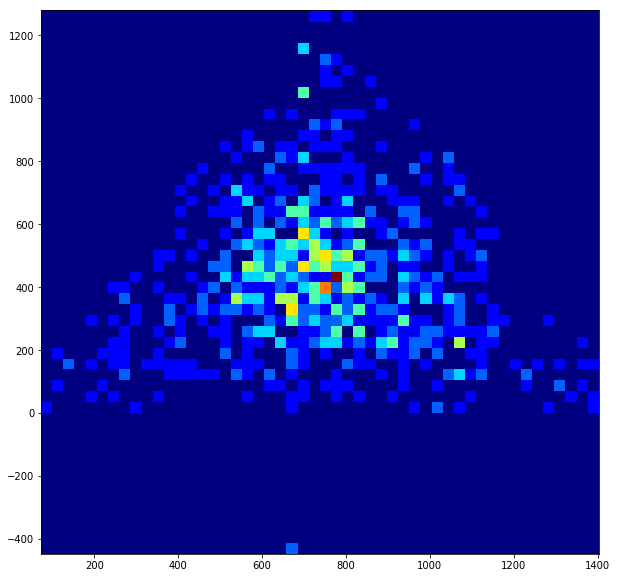

In [33]:
df.NewYCore = df.NewYCore.mask(df['TriangleType'] == 2, -df.NewYCore)
plt.hist2d(df.NewXCore,df.NewYCore.mask(df['TriangleType'] == 2, - df.NewYCore), bins=(50, 50), cmap=plt.cm.jet)
plt.show()

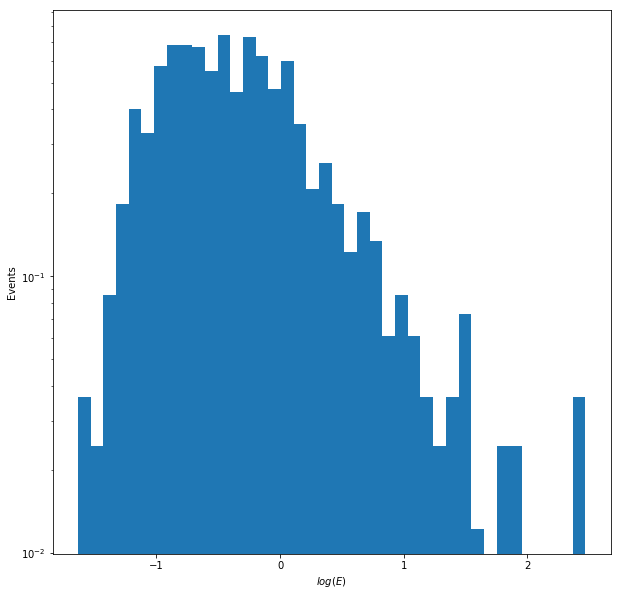

In [63]:
x = np.log(df.EnergyCorr)
y = np.log(len(df))
plt.hist(x, normed=True, bins= 40)
plt.xlabel('$log(E)$')
plt.ylabel('Events')
plt.yscale('log')
plt.show()